<a href="https://colab.research.google.com/github/AzrielFirmansyah/ProjectDeepLearning/blob/main/ArtStyleTransfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Apa itu Art Style Transfer?

Art style transfer adalah teknik dalam pemrosesan gambar yang memungkinkan kita untuk mengaplikasikan gaya artistik dari satu gambar ke gambar lainnya. Misalnya, kita bisa membuat foto kita terlihat seperti lukisan Van Gogh.

**1. Install Library tensorflow-hub berisi model-model pembelajaran mesin yang sudah dilatih sebelumnya, termasuk model untuk art style transfer.**

In [1]:
!pip install tensorflow-hub

2. Import Library
*Pada* sel berikutnya, import library yang akan digunakan:

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import PIL.Image
import matplotlib.pylab as plt

3. Load Model


*Pilih model style transfer yang sesuai dari TensorFlow Hub. Ada banyak model yang tersedia dengan gaya yang berbeda-beda. Sebagai contoh, kita akan menggunakan model "magenta/arbitrary-image-stylization-v1-256":*

In [3]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

4. Load Gambar



1.   Upload gambar konten (gambar yang ingin kita ubah gaya) dan gambar gaya (gambar yang gayanya ingin kita tiru) ke Google Colab.
2.   Baca kedua gambar tersebut menggunakan library PIL:



In [5]:
content_image = PIL.Image.open('gusdur.jpg')
style_image = PIL.Image.open('abstrak.jpg')

5. Preprocess Gambar

Ubah ukuran gambar dan normalisasi nilai piksel agar sesuai dengan input model:

In [6]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

content_image = load_img('gusdur.jpg')
style_image = load_img('abstrak.jpg')

6. Aplikasi Gaya

Menggunakan model yang sudah di-load untuk mengaplikasikan gaya dari gambar gaya ke gambar konten:

In [7]:
stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]

7. Menampilkan Hasil

Mengubah data tensor menjadi format yang bisa ditampilkan oleh matplotlib:

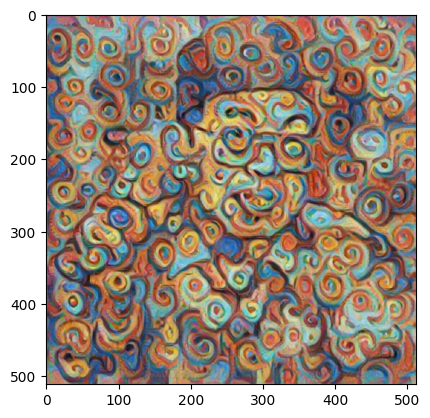

In [8]:
plt.imshow(stylized_image[0])
plt.show()